# Problem Statement

we have given a banking dataset which have two csv files names training & testing set which is extracted from kaggle website.
so now we have to predict the loan status of that data by using differnt algorithms including machine learning &
deep learning.

# Algoritm used :
    Logistic regression
    
    Decision Tree
    
    Random forest
    
    Adaboost Classifier
    
    Artificial Neural Network

# Libraries

In [1]:
# Import the required Libraries.

from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Read Dataset, Visualize & Analysis

In [2]:
Loan_Train = pd.read_csv("E:/ETLHIVE/dataset/Training set of Loan status.csv")

In [3]:
#Loan_Train.head()
#Loan_Train.tail()
Loan_Train.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
380,LP002226,Male,Yes,0,Graduate,NaN,3333.0,2500.0,128.0,360.0,1.0,Semiurban,Y
474,LP002524,Male,No,2,Graduate,No,5532.0,4648.0,162.0,360.0,1.0,Rural,Y
403,LP002300,Female,No,0,Not Graduate,No,1963.0,0.0,53.0,360.0,1.0,Semiurban,Y
199,LP001673,Male,No,0,Graduate,Yes,11000.0,0.0,83.0,360.0,1.0,Urban,N
227,LP001758,Male,Yes,2,Graduate,No,6250.0,1695.0,210.0,360.0,1.0,Semiurban,Y


In [4]:
Loan_Train.shape

(614, 13)

In [5]:
Loan_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [6]:
Loan_Train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
Loan_Train = Loan_Train.drop(["Loan_ID"],axis=1)

# Missing Data Handling

In [8]:
Loan_Train.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [10]:
replacer(Loan_Train)

In [11]:
Loan_Train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

In [12]:
def EDA(df):
    import seaborn as sb
    import matplotlib.pyplot as plt
    cat = []
    con = []
    for i in df.columns:
        if( df[i].dtypes =="object"):
            cat.append(i)
        else:
            con.append(i)
    for i in df[con]:
        sb.boxplot(df[i],color ="g")
        plt.show()
    
        sb.distplot(df[i],color ="r")
        plt.show()
        
        sb.scatterplot(Loan_Train[i],Loan_Train.LoanAmount)
        plt.show()

    
    for i in df[cat]:
        sb.countplot(df[i],palette = "husl",hue = Loan_Train.Loan_Status)
        plt.show()
        sb.boxplot(Loan_Train[i],Loan_Train.LoanAmount,hue = Loan_Train.Loan_Status)
        plt.show()

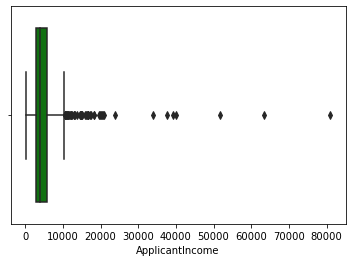

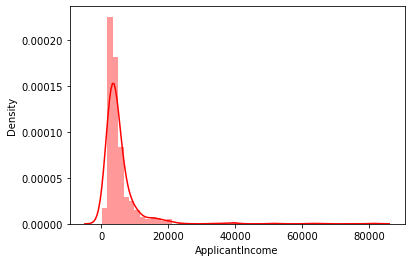

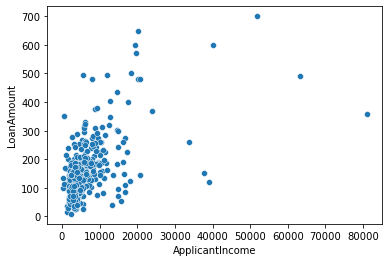

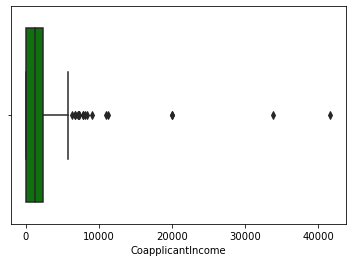

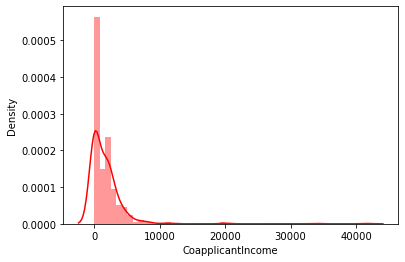

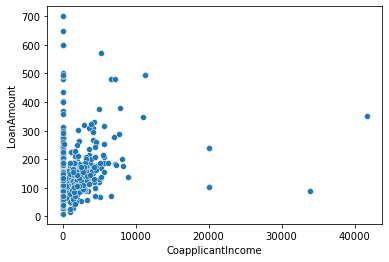

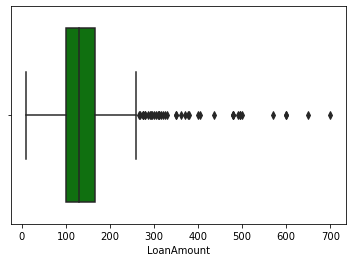

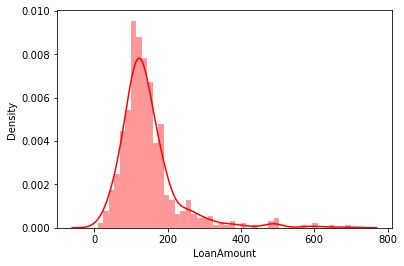

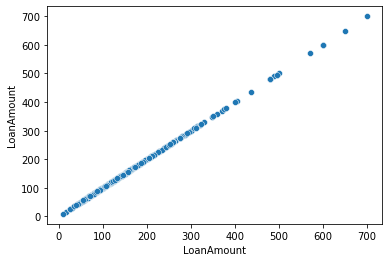

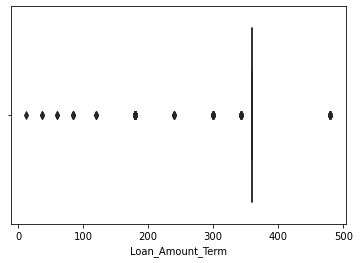

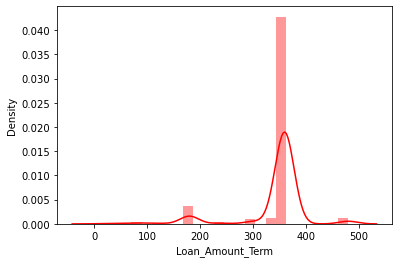

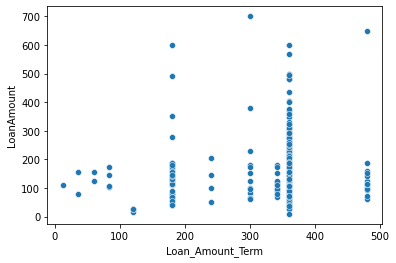

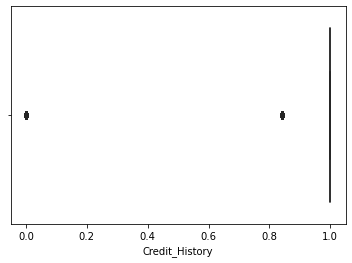

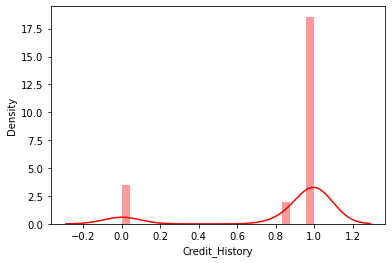

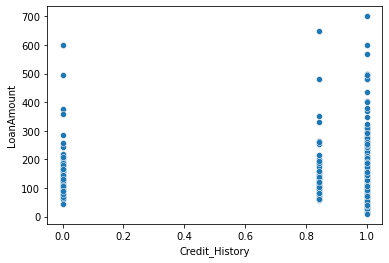

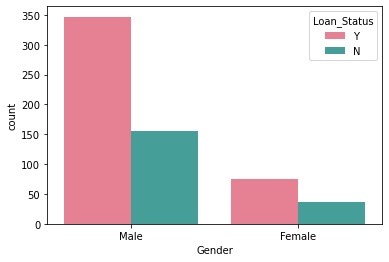

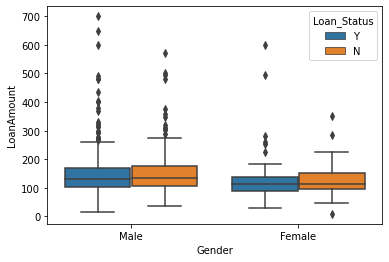

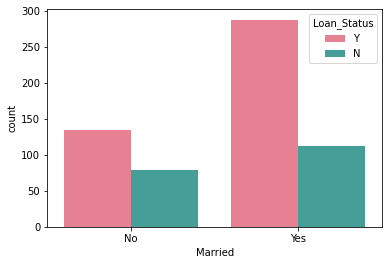

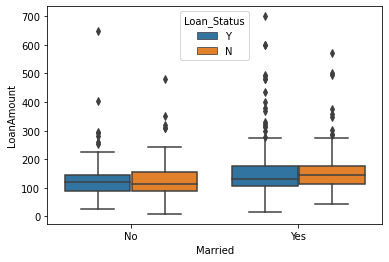

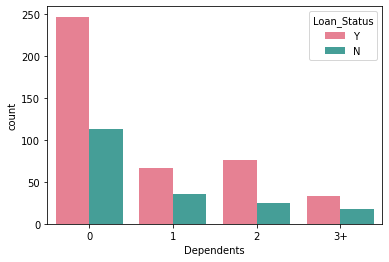

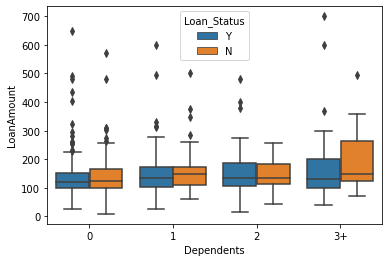

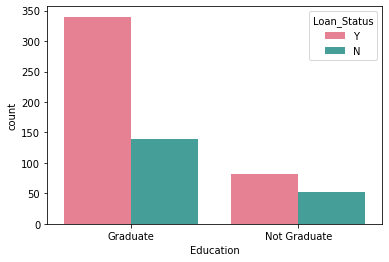

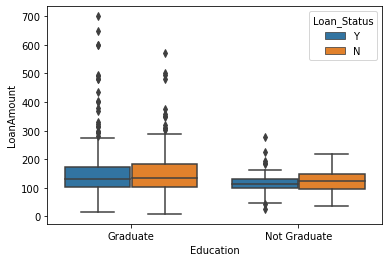

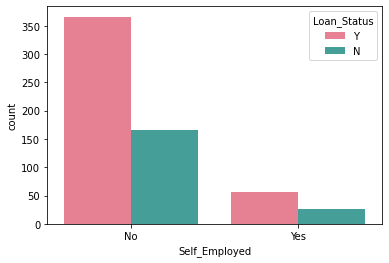

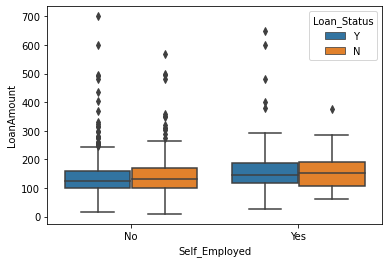

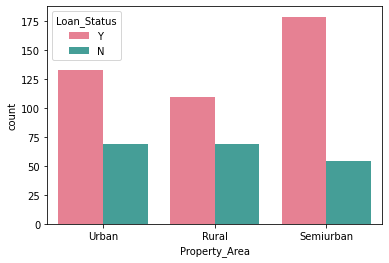

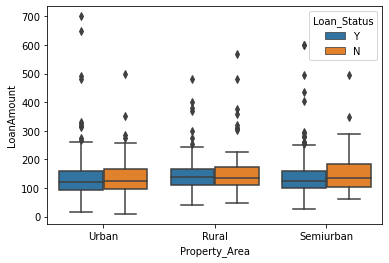

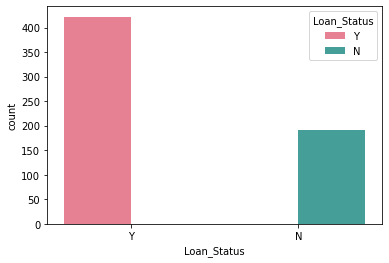

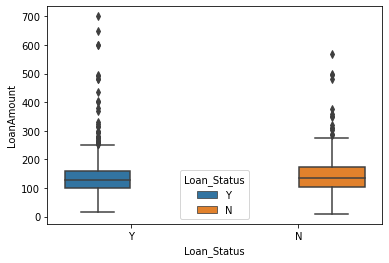

In [13]:
EDA(Loan_Train)

In [14]:
# ANOVA test for checking important categorical features
cat = []
con = []
for i in Loan_Train.columns:
    if(Loan_Train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
        
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,4)

imp_cat_cols = []
for i in cat :
    pval = ANOVA(Loan_Train,i,"LoanAmount")
    print("LoanAmount vs ",i, ANOVA(Loan_Train,i,"LoanAmount"))
    if(pval < 0.05 ):
        imp_cat_cols.append(i)

LoanAmount vs  Gender 0.0074
LoanAmount vs  Married 0.0003
LoanAmount vs  Dependents 0.0001
LoanAmount vs  Education 0.0
LoanAmount vs  Self_Employed 0.0042
LoanAmount vs  Property_Area 0.5255
LoanAmount vs  Loan_Status 0.3677


# Define X and Y

In [15]:
Y = Loan_Train[["Loan_Status"]]
X = Loan_Train.drop(["Loan_Status"],axis=1)

In [16]:
Y_Original = Y[["Loan_Status"]]

In [17]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(5), object(6)
memory usage: 52.9+ KB


In [19]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Data Preprocessing 
using one hot encoding for categorical and standardscaler for continous varibles

In [20]:
def preprocessing(df):
    import pandas as pd
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    X1 = pd.get_dummies(df[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X3 = X2.join(X1)
    return X3

In [21]:
Xnew = preprocessing(X)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = pd.DataFrame(le.fit_transform(Y),columns=["Loan_Status"])

# Outlier Treatment

In [23]:
Outlier_treatment =  Xnew.join(Y)

In [24]:
Outlier_treatment.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.072651,-0.554368,0.000000,0.279851,0.451640,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
1,0.000000,-0.038610,-0.219273,0.279851,0.451640,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
2,-0.394096,-0.554368,-0.957641,0.279851,0.451640,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,1
3,-0.462412,0.252103,-0.314547,0.279851,0.451640,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,1
4,0.097389,-0.554368,-0.064454,0.279851,0.451640,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
5,0.001877,0.880726,1.436099,0.279851,0.451640,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,1
6,-0.503369,-0.035874,-0.612275,0.279851,0.451640,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,1
7,-0.388198,0.302037,0.138001,0.279851,-2.410441,0,1,0,1,0,...,0,1,1,0,1,0,0,1,0,0
8,-0.229285,-0.032453,0.257093,0.279851,0.451640,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,1
9,1.218139,3.196849,2.412650,0.279851,0.451640,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0


In [25]:
def outliers(df):
    T = []
    for i in range(0,len(df.columns)):
        for j in range(0,df.shape[0]):
            x = df.iloc[j,i]
            if((x>3)or(x<-3)):
                T.append(j)

    from numpy import unique
    rows_del = list(unique(T))
    return rows_del

In [26]:
outliers= outliers(Outlier_treatment)

In [27]:
Outlier_treatment = Outlier_treatment.drop(outliers)

In [28]:
Outlier_treatment

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.072651,-0.554368,0.000000,0.279851,0.451640,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
1,0.000000,-0.038610,-0.219273,0.279851,0.451640,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
2,-0.394096,-0.554368,-0.957641,0.279851,0.451640,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,1
3,-0.462412,0.252103,-0.314547,0.279851,0.451640,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,1
4,0.097389,-0.554368,-0.064454,0.279851,0.451640,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410479,-0.554368,-0.898095,0.279851,0.451640,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,1
610,-0.212902,-0.554368,-1.267279,-2.518655,0.451640,0,1,0,1,0,...,0,1,1,0,1,0,1,0,0,1
611,0.436842,-0.472284,1.269371,0.279851,0.451640,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,1
612,0.356730,-0.554368,0.483367,0.279851,0.451640,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,1


In [29]:

Xnew = Outlier_treatment.drop(labels = (["Loan_Status"]),axis = 1)

In [30]:
Xnew.head(15)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072651,-0.554368,0.000000,0.279851,4.516405e-01,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.000000,-0.038610,-0.219273,0.279851,4.516405e-01,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.394096,-0.554368,-0.957641,0.279851,4.516405e-01,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.462412,0.252103,-0.314547,0.279851,4.516405e-01,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.097389,-0.554368,-0.064454,0.279851,4.516405e-01,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
5,0.001877,0.880726,1.436099,0.279851,4.516405e-01,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
6,-0.503369,-0.035874,-0.612275,0.279851,4.516405e-01,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
7,-0.388198,0.302037,0.138001,0.279851,-2.410441e+00,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
8,-0.229285,-0.032453,0.257093,0.279851,4.516405e-01,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
10,-0.361330,-0.314958,-0.910004,0.279851,4.516405e-01,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [31]:
Y = Outlier_treatment[["Loan_Status"]]

In [32]:
Y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


# Divide data in Training & testing set

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Create Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
model_log_reg = log_reg.fit(xtrain,ytrain)

In [35]:
pred_tr = model_log_reg.predict(xtrain)
pred_ts = model_log_reg.predict(xtest)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
tr_acc_log_reg = accuracy_score(ytrain,pred_tr)
ts_acc_log_reg = accuracy_score(ytest,pred_ts)
print("training_accuracy_log_reg :", tr_acc_log_reg)
print("testing_accuracy_log_reg :", ts_acc_log_reg)

training_accuracy_log_reg : 0.8112798264642083
testing_accuracy_log_reg : 0.8362068965517241


In [37]:
confusion_matrix(ytrain,pred_tr)

array([[ 65,  79],
       [  8, 309]], dtype=int64)

In [38]:
confusion_matrix(ytest,pred_ts)

array([[17, 18],
       [ 1, 80]], dtype=int64)

# Create DecisionTree Classifier Model 

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)
model_dtc = dtc.fit(xtrain,ytrain)
predtr1 = model_dtc.predict(xtrain)
predts1 = model_dtc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc_dec_tree = accuracy_score(ytrain,predtr1)
ts_acc_dec_tree = accuracy_score(ytest,predts1)
print("training_accuracy_dec_tree :", tr_acc_dec_tree)
print("testing_accuracy_dec_tree :", ts_acc_dec_tree)

training_accuracy_dec_tree : 1.0
testing_accuracy_dec_tree : 0.6810344827586207


# Decision Tree Model has good training accuracy but give bad testing accuracy - model is overfitted
so we use prunning to overcome this overfitting, for that we use "min samples leaf" Hyperparameter

In [40]:
from sklearn.model_selection import GridSearchCV
tg = {"min_samples_leaf":range(2,60,1)}
dtc = DecisionTreeClassifier(random_state=21)
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 25}

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=25)
model1 = dtc.fit(xtrain,ytrain)
predtr1 = model_dtc.predict(xtrain)
predts1 = model_dtc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc1 = accuracy_score(ytrain,predtr1)
ts_acc1 = accuracy_score(ytest,predts1)
print("training_accuracy_dec_tree :", tr_acc_dec_tree)
print("testing_accuracy_dec_tree :", ts_acc_dec_tree)

training_accuracy_dec_tree : 1.0
testing_accuracy_dec_tree : 0.6810344827586207


In [42]:
from sklearn.model_selection import GridSearchCV
tg = {"min_samples_split":range(2,15,1)}
dtc = DecisionTreeClassifier(random_state=21)
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_split': 14}

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_split=14)
model1 = dtc.fit(xtrain,ytrain)
predtr1 = model_dtc.predict(xtrain)
predts1 = model_dtc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc1 = accuracy_score(ytrain,predtr1)
ts_acc1 = accuracy_score(ytest,predts1)
print("training_accuracy_dec_tree :", tr_acc_dec_tree)
print("testing_accuracy_dec_tree :", ts_acc_dec_tree)

training_accuracy_dec_tree : 1.0
testing_accuracy_dec_tree : 0.6810344827586207


# Create Random Forest classifier model

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 21)
model_rfc = rfc.fit(xtrain,ytrain)
predtr2 = model_rfc.predict(xtrain)
predts2 = model_rfc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc_rf = accuracy_score(ytrain,predtr2)
ts_acc_rf = accuracy_score(ytest,predts2)
print("training_accuracy_rf :", tr_acc_rf)
print("testing_accuracy_rf :", ts_acc_rf)

training_accuracy_rf : 1.0
testing_accuracy_rf : 0.8103448275862069


# Random Forest Model has good training accuracy but give bad testing accuracy - model is overfitted
#so we use prunning to overcome this overfitting, for that we use "n_estimators" Hyperparameter

In [45]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
rfc = RandomForestClassifier(random_state = 21)
cv1 = GridSearchCV(rfc,tg,scoring="accuracy",cv=4)
cvmodel1 = cv1.fit(xtrain,ytrain)
cvmodel1.best_params_

{'n_estimators': 87}

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=87,random_state = 21,min_samples_leaf=25)
model_rfc = rfc.fit(xtrain,ytrain)
predtr2 = model_rfc.predict(xtrain)
predts2 = model_rfc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc2 = accuracy_score(ytrain,predtr2)
ts_acc2 = accuracy_score(ytest,predts2)
print("training_accuracy_rf :", tr_acc_rf)
print("testing_accuracy_rf :", ts_acc_rf)

training_accuracy_rf : 1.0
testing_accuracy_rf : 0.8103448275862069


# Create Adaboost model

In [47]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21))
model_abc = abc.fit(xtrain,ytrain)
predtr3 = model_abc.predict(xtrain)
predts3 = model_abc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc_abc = accuracy_score(ytrain,predtr3)
ts_acc_abc = accuracy_score(ytest,predts3)
print("training_accuracy_abc :", tr_acc_abc)
print("testing_accuracy_abc :", ts_acc_abc)


training_accuracy_abc : 1.0
testing_accuracy_abc : 0.7241379310344828


# Adaboost Model has good training accuracy but give bad testing accuracy - model is overfitted
so we use prunning to overcome this overfitting, for that we use "n_estimators" Hyperparameter

In [48]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21))
cv1 = GridSearchCV(abc,tg,scoring="accuracy",cv=4)
cvmodel2 = cv1.fit(xtrain,ytrain)
cvmodel2.best_params_

{'n_estimators': 38}

In [49]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,min_samples_leaf=25),n_estimators=13)
model_abc = abc.fit(xtrain,ytrain)
predtr3 = model_abc.predict(xtrain)
predts3 = model_abc.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc_abc = accuracy_score(ytrain,predtr3)
tr_acc_abc = accuracy_score(ytest,predts3)
print("training_accuracy_abc :", tr_acc_abc)
print("testing_accuracy_abc :", ts_acc_abc)

training_accuracy_abc : 0.8189655172413793
testing_accuracy_abc : 0.7241379310344828


# Create Neural Network

In [50]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
nn = Sequential()
nn.add(Dense(32,activation="relu",input_dim = xtrain.shape[1])) # Input Layer
nn.add(Dense(32,activation="relu")) # Hidden Layer
nn.add(Dense(1,activation="sigmoid")) # Output Layer
nn.compile(loss = "binary_crossentropy",metrics=["accuracy"])
nn.fit(Xnew,Y,validation_split=0.2,epochs=250)

Epoch 1/250
15/15 [==============================] - 2s 25ms/step - loss: 0.6339 - accuracy: 0.6833 - val_loss: 0.5758 - val_accuracy: 0.7500
Epoch 2/250
15/15 [==============================] - 0s 6ms/step - loss: 0.5529 - accuracy: 0.7636 - val_loss: 0.5232 - val_accuracy: 0.8017
Epoch 3/250
15/15 [==============================] - 0s 6ms/step - loss: 0.5104 - accuracy: 0.8113 - val_loss: 0.4907 - val_accuracy: 0.8362
Epoch 4/250
15/15 [==============================] - 0s 6ms/step - loss: 0.4824 - accuracy: 0.8134 - val_loss: 0.4666 - val_accuracy: 0.8362
Epoch 5/250
15/15 [==============================] - 0s 6ms/step - loss: 0.4642 - accuracy: 0.8134 - val_loss: 0.4562 - val_accuracy: 0.8362
Epoch 6/250
15/15 [==============================] - 0s 6ms/step - loss: 0.4541 - accuracy: 0.8156 - val_loss: 0.4531 - val_accuracy: 0.8362
Epoch 7/250
15/15 [==============================] - 0s 5ms/step - loss: 0.4460 - accuracy: 0.8156 - val_loss: 0.4510 - val_accuracy: 0.8362
Epoch 8/250


# Keras tuner for Overcome Overfitting Condition

In [51]:
import keras_tuner as kt

In [52]:
def model_builder(hp):
    nn = Sequential()
    nn.add(Dense(200,input_dim=(Xnew.shape[1])))
    nn.add(Dropout(0.1))
    y = hp.Choice("units",values=[64,128,256,512])
    nn.add(Dense(units=y))
    x = hp.Choice("rate",values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    nn.add(Dropout(rate=x))
    nn.add(Dense(20))
    nn.add(Dense(1,activation="sigmoid"))
    nn.compile(loss="binary_crossentropy",metrics="accuracy")
    return nn

In [53]:
tuner = kt.Hyperband(model_builder,
             objective="val_accuracy",
             max_epochs=200,
             directory="E:/ETLHIVE/NN_Loan",
             project_name="NN_Loan_tuner")

INFO:tensorflow:Reloading Oracle from existing project E:/ETLHIVE/NN_Loan\NN_Loan_tuner\oracle.json
INFO:tensorflow:Reloading Tuner from E:/ETLHIVE/NN_Loan\NN_Loan_tuner\tuner0.json


In [54]:
tuner.search(xtrain,ytrain,epochs=30,validation_split=0.2)

INFO:tensorflow:Oracle triggered exit


In [55]:
best = tuner.get_best_hyperparameters(num_trials=7)[0]

In [56]:
best.get("rate")  # Hyperparameter for DropOut

0.5

In [57]:
best.get("units") # Hyperparameter for Hidden layer size

64

In [58]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
nn = Sequential()
nn.add(Dense(512,activation="relu",input_dim = xtrain.shape[1])) # Input Layer
nn.add(Dropout(0.8))
nn.add(Dense(512,activation="relu")) # Hidden Layer
nn.add(Dropout(0.8))
nn.add(Dense(1,activation="sigmoid")) # Output Layer
nn.compile(loss = "binary_crossentropy",metrics=["accuracy"])
nn.fit(Xnew,Y,validation_split=0.2,epochs=200)

Epoch 1/200
15/15 [==============================] - 2s 41ms/step - loss: 0.6626 - accuracy: 0.6464 - val_loss: 0.5275 - val_accuracy: 0.7155
Epoch 2/200
15/15 [==============================] - 0s 15ms/step - loss: 0.5673 - accuracy: 0.7570 - val_loss: 0.4801 - val_accuracy: 0.8276
Epoch 3/200
15/15 [==============================] - 0s 13ms/step - loss: 0.5007 - accuracy: 0.7961 - val_loss: 0.4498 - val_accuracy: 0.8362
Epoch 4/200
15/15 [==============================] - 0s 13ms/step - loss: 0.5059 - accuracy: 0.8091 - val_loss: 0.4524 - val_accuracy: 0.8362
Epoch 5/200
15/15 [==============================] - 0s 13ms/step - loss: 0.5073 - accuracy: 0.8069 - val_loss: 0.4508 - val_accuracy: 0.8362
Epoch 6/200
15/15 [==============================] - 0s 13ms/step - loss: 0.4635 - accuracy: 0.7983 - val_loss: 0.4596 - val_accuracy: 0.8362
Epoch 7/200
15/15 [==============================] - 0s 13ms/step - loss: 0.4693 - accuracy: 0.8091 - val_loss: 0.4733 - val_accuracy: 0.8362
Epoch 

# Prepare test Data set

In [59]:
test_data = pd.read_csv("E:/ETLHIVE/dataset/Testing_set_Loan_status.csv")

In [60]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [61]:
test = test_data.drop(["Loan_ID"],axis=1)

In [62]:
test.isna().sum() # check any missing values in data set

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [63]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [64]:
replacer(test) # replace missing values, if missing value is categorical then is mode and for continous use mean value

In [65]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Data Preprocessing on test Data set

In [66]:
def preprocessing(df):
    import pandas as pd
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    X1 = pd.get_dummies(df[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X3 = X2.join(X1)
    return X3

In [67]:
xtest = preprocessing(test)

# 1) Logistic regression model for prediction

In [68]:
pred_test_data = le.inverse_transform(model_log_reg.predict(xtest))

In [69]:
prediction = test_data[["Loan_ID"]]

In [70]:
prediction["Loan_Status_Log_Reg"] = pred_test_data

In [71]:
prediction

,Loan_ID,Loan_Status_Log_Reg
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


# 2) DecisionTree model for prediction

In [72]:
pred_decisiontree = le.inverse_transform(model_dtc.predict(xtest))

In [73]:
prediction['LoanStatus_DecisionTree'] = pred_decisiontree

In [74]:
prediction

,Loan_ID,Loan_Status_Log_Reg,LoanStatus_DecisionTree
0,LP001015,Y,Y
1,LP001022,Y,Y
2,LP001031,Y,Y
3,LP001035,Y,Y
4,LP001051,Y,Y
...,...,...,...
362,LP002971,Y,Y
363,LP002975,Y,N
364,LP002980,Y,Y
365,LP002986,Y,N


#  3) Random forest model for prediction

In [75]:
pred_randomforest =le.inverse_transform( model_rfc.predict(xtest))

In [76]:
prediction["LoanStatus_Randomforest"] = pred_randomforest

In [77]:
prediction

,Loan_ID,Loan_Status_Log_Reg,LoanStatus_DecisionTree,LoanStatus_Randomforest
0,LP001015,Y,Y,Y
1,LP001022,Y,Y,Y
2,LP001031,Y,Y,Y
3,LP001035,Y,Y,Y
4,LP001051,Y,Y,Y
...,...,...,...,...
362,LP002971,Y,Y,Y
363,LP002975,Y,N,Y
364,LP002980,Y,Y,Y
365,LP002986,Y,N,Y


# 4) Adaboost model for prediction

In [78]:
pred_Adaboost=le.inverse_transform(model_abc.predict(xtest))

In [79]:
prediction["LoanStatus_Adaboost"] = pred_Adaboost

In [80]:
prediction

,Loan_ID,Loan_Status_Log_Reg,LoanStatus_DecisionTree,LoanStatus_Randomforest,LoanStatus_Adaboost
0,LP001015,Y,Y,Y,Y
1,LP001022,Y,Y,Y,Y
2,LP001031,Y,Y,Y,Y
3,LP001035,Y,Y,Y,Y
4,LP001051,Y,Y,Y,Y
...,...,...,...,...,...
362,LP002971,Y,Y,Y,Y
363,LP002975,Y,N,Y,N
364,LP002980,Y,Y,Y,Y
365,LP002986,Y,N,Y,N


# 5. Neural Network Model for prediction

In [81]:
Pred_NN = nn.predict(xtest)

In [82]:
Q = []
for i in Pred_NN:
    if(i[0] < 0.5):
        Q.append(0)
    else:
        Q.append(1)
    

In [83]:
pred = le.inverse_transform(Q)

In [84]:
prediction["LoanStatus_NN"] = pred

In [85]:
pd.set_option("display.max_rows",367)

In [86]:
round(prediction)

,Loan_ID,Loan_Status_Log_Reg,LoanStatus_DecisionTree,LoanStatus_Randomforest,LoanStatus_Adaboost,LoanStatus_NN
0,LP001015,Y,Y,Y,Y,Y
1,LP001022,Y,Y,Y,Y,Y
2,LP001031,Y,Y,Y,Y,Y
3,LP001035,Y,Y,Y,Y,Y
4,LP001051,Y,Y,Y,Y,N
5,LP001054,Y,Y,Y,Y,Y
6,LP001055,Y,Y,Y,Y,Y
7,LP001056,N,N,N,N,N
8,LP001059,Y,Y,Y,Y,Y
9,LP001067,Y,Y,Y,Y,Y


In [87]:
prediction

,Loan_ID,Loan_Status_Log_Reg,LoanStatus_DecisionTree,LoanStatus_Randomforest,LoanStatus_Adaboost,LoanStatus_NN
0,LP001015,Y,Y,Y,Y,Y
1,LP001022,Y,Y,Y,Y,Y
2,LP001031,Y,Y,Y,Y,Y
3,LP001035,Y,Y,Y,Y,Y
4,LP001051,Y,Y,Y,Y,N
5,LP001054,Y,Y,Y,Y,Y
6,LP001055,Y,Y,Y,Y,Y
7,LP001056,N,N,N,N,N
8,LP001059,Y,Y,Y,Y,Y
9,LP001067,Y,Y,Y,Y,Y


In [88]:
test_data["prediction_ABC"] = pred_Adaboost

In [91]:
test_data_yes  =  test_data[test_data.prediction_ABC == "Y"]

In [92]:
test_data_yes

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,prediction_ABC
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,Y
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,Y
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,Y
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,Y
10,LP001078,Male,No,0,Not Graduate,No,3091,0,90.0,360.0,1.0,Urban,Y


In [93]:
test_data_yes.to_csv("E:/ETLHIVE/test_data_yes.csv",index = False)